In [125]:
# import math
import numpy as np
import pandas as pd
import scipy.stats as st
import sys
# import itertools
# from functions import *
from mining_functions import *
# from collections import Counter
import matplotlib.pyplot as plt
# from scipy import stats
# from matplotlib.backends.backend_pdf import PdfPages
# from tabulate import tabulate
np.set_printoptions(precision=2)
pd.set_option('precision', 2)
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = 25, 15

In [126]:
PATH = '/Google Drive/Jonathan Sarah Ido folder/data/CCK/'
def get_path(path = PATH):
    if os.name == 'posix':
        return os.environ['HOME']+path #'/Google Drive/Jonathan Sarah Ido folder/data/CCK/'
    elif os.name == 'nt':
        return os.environ['USERPROFILE']+ path.replace('/','\\') #'\\Google Drive\Jonathan Sarah Ido folder\data\CCK\\'
    else:
        raise Exception('OS not recongnized. I\'m confused.')
gitpath = '/Documents/code/Phet-log-analyzer/cck/raw_data_parsing_check/'
df = pd.read_csv(get_path(gitpath) + 'phet_cck_user_actions+sophistication_WITHPAUSE_more_circuit_info.txt',index_col=False)
# dfx = pd.read_csv('C:\Users\Sarah\Documents\git\Phet-log-analyzer\cck\\raw_data_parsing_check\phet_cck_user_actions+sophistication_WITHPAUSE_more_circuit_info.txt',index_col=False)
df["student"] = df["student"].astype('category')
df["Family"]=df["Family"].str.capitalize()
df["Family_tool"]=df["Family_tool"].str.capitalize()
df["Family_default"]=df["Family_default"].str.capitalize()
df["Family_both"]=df["Family_both"].str.capitalize()

df_scores = pd.read_csv(data_path + 'MATCHING_phet_cck_user_data_anonymized.txt')
df_scores["student"] = df_scores["student"].astype('category')




There are a total of 74 novices of which LL=36 and LH=38
There are a total of 22 incoming experts of which HH=19 and HL=3


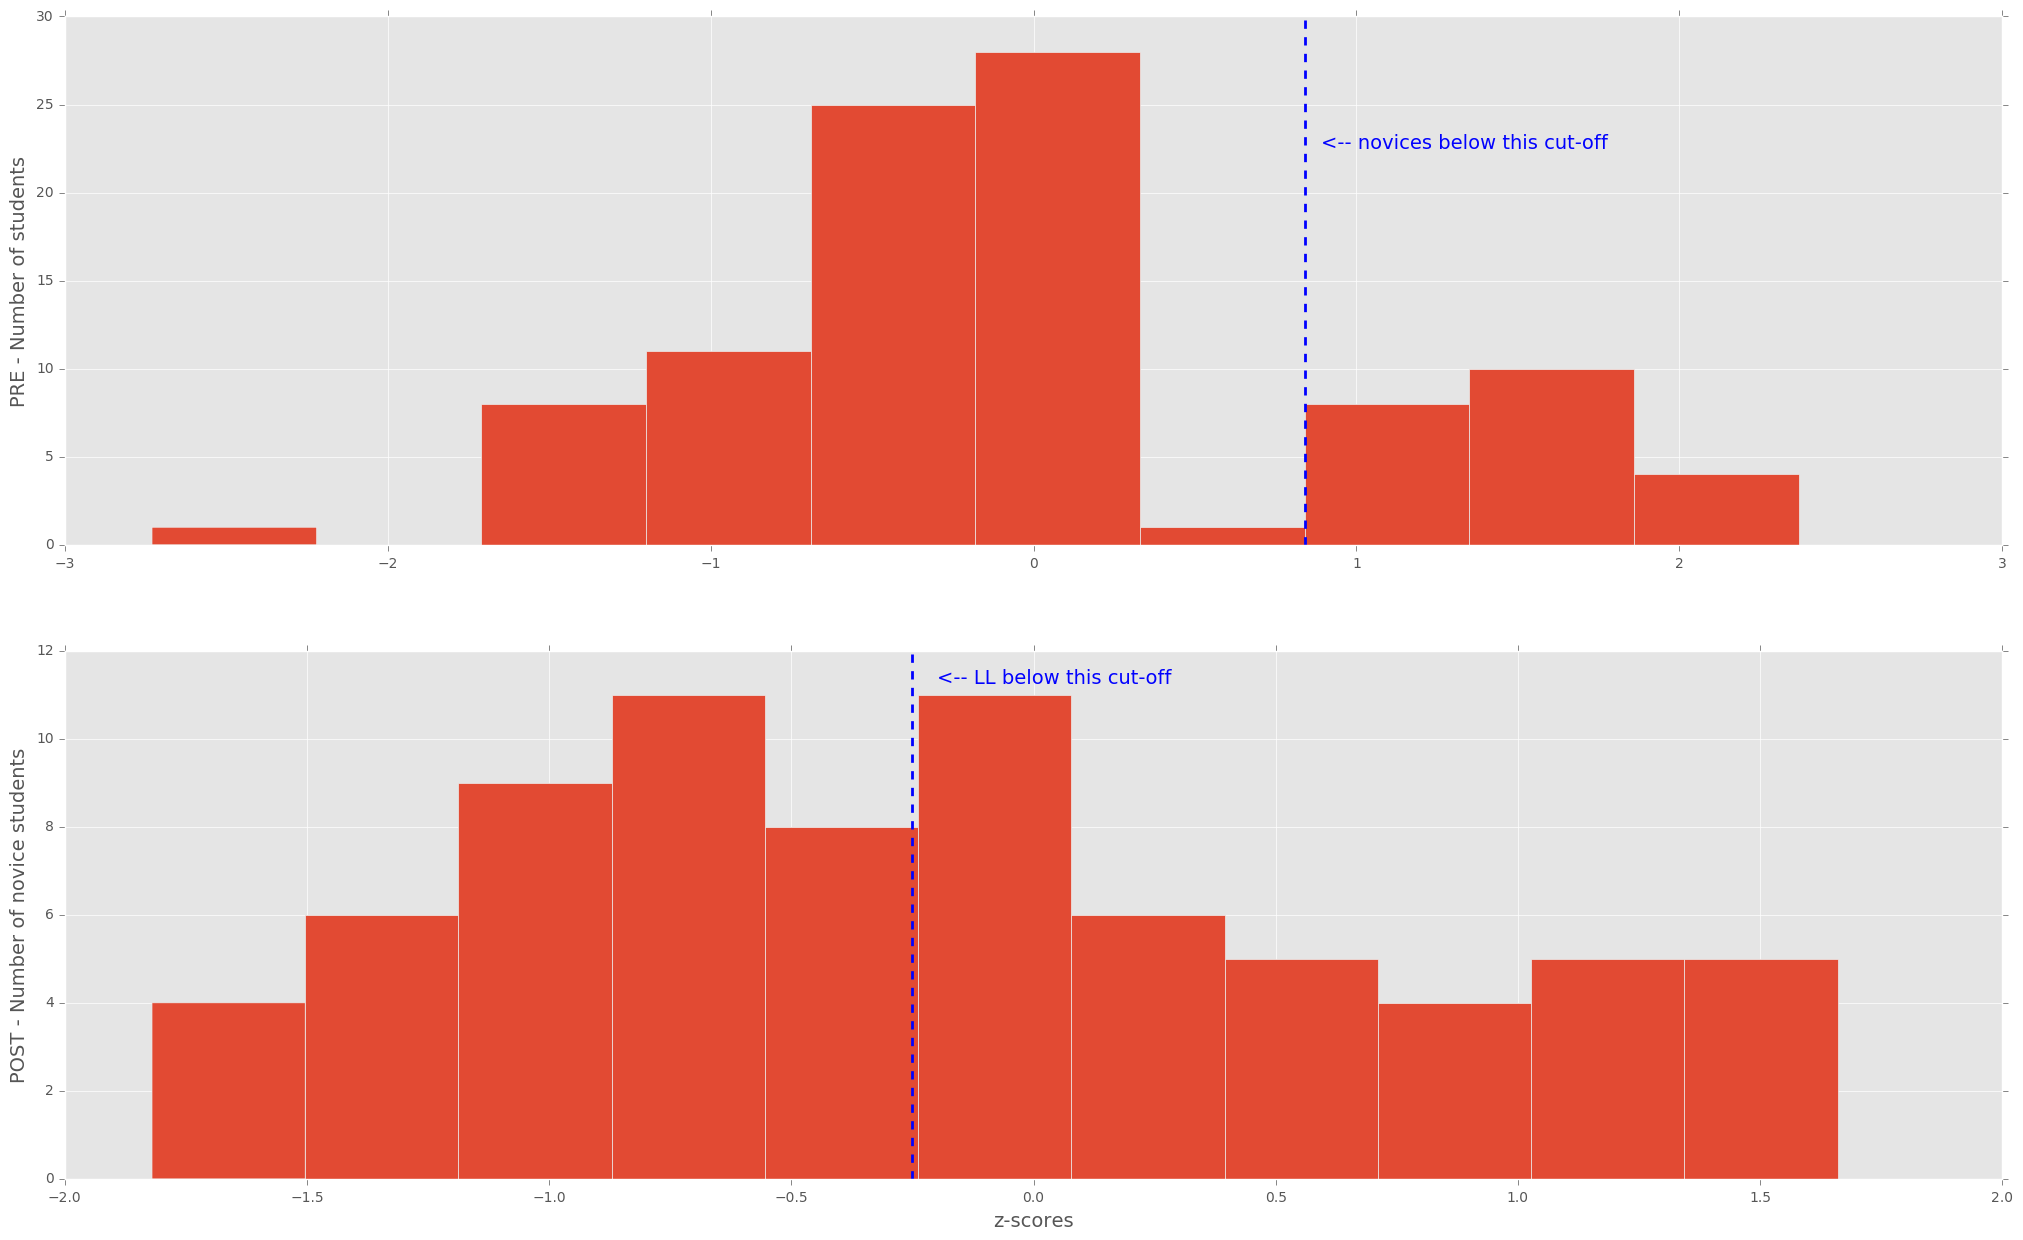

In [127]:
##plot pre-test z-scores
pre_scores = df_scores['z pre']
plt.subplot(2,1,1)
hpre = plt.hist(pre_scores)
plt.ylabel('PRE - Number of students', fontsize=14)
#cut-off for novices defined at minima in bimodal dist
cutoff = hpre[1][7]
plt.axvline(cutoff, ls = '--', lw = 2)
plt.text(cutoff+0.05, 22.5, '<-- novices below this cut-off', fontsize=14, color='blue')

##plot post-test z-scores of novices (as defined above)
post_scores_novices = df_scores['z post t2'][df_scores['z pre'] < cutoff]
plt.subplot(2,1,2)
hpost = plt.hist(post_scores_novices, bins=11)
plt.ylabel('POST - Number of novice students', fontsize=14)
plt.xlabel('z-scores', fontsize=14)
#cut-off for high vs low learning novice defined by median split
post_scores_novices_mdn = np.median(post_scores_novices)
plt.axvline(post_scores_novices_mdn, ls = '--', lw = 2)
plt.text(post_scores_novices_mdn+0.05, 11.25, '<-- LL below this cut-off', fontsize=14, color='blue')

##forming groups of students ID for LL, LH, HH and HL
students = df_scores['student']
novice_students = df_scores['student'][df_scores['z pre'] < cutoff]
low_post_students = df_scores['student'][df_scores['z post t2'] < post_scores_novices_mdn]
high_post_students = df_scores['student'][df_scores['z post t2'] >= post_scores_novices_mdn]
LL_students = list( set(novice_students) & set(low_post_students) )
LH_students = list( set(novice_students) - set(LL_students) )
HH_students = list( set(students) & set(high_post_students) - set(novice_students) )
HL_students = list( set(students) & set(low_post_students) - set(novice_students) )
print 'There are a total of {} novices of which LL={} and LH={}'.format(len(novice_students),len(LL_students), len(LH_students))
print 'There are a total of {} incoming experts of which HH={} and HL={}'.format(len(students)-len(novice_students),len(HH_students), len(HL_students))


In [128]:
top5seqLH = ['PTsPC', 'CTsPTsP', 'PTsP', 'TsPTsPC', 'CPTs']
top5seqLL = ['PCTcCTcC', 'CPCTsC', 'PCPCTcC', 'TcCPC', 'TsCTsC']

In [129]:
blocksLH, _ = get_blocks_withTime_new(df, LH_students, 'Family', as_list = False, ignore = ['I','To'], start = False)
blocksLL, _ = get_blocks_withTime_new(df, LL_students, 'Family', as_list = False, ignore = ['I','To'], start = False)

In [149]:
student_list = []
for seq in top5seqLH:
    a = list([ student for student in LH_students if re.search(seq, blocksLH[student]) ])
    print seq, '-->', len(a)
    student_list += a

unique_student_list_LH = set(student_list)
print "Total unique LH students using these top 5 unproductive sequences:", len(unique_student_list_LH),
print ', which is', len(unique_student_list_LH)/(1.0*len(LH_students)), 'of the LH population \n'
print 'Number of these students in each a1 support condition:'
print df_scores['scaffolding'][df_scores['student'].isin(unique_student_list_LH)].value_counts()

PTsPC --> 20
CTsPTsP --> 13
PTsP --> 23
TsPTsPC --> 13
CPTs --> 15
Total unique LH students using these top 5 unproductive sequences: 25 , which is 0.657894736842 of the LH population 

Number of these students in each a1 support condition:
scaff    14
not      11
Name: scaffolding, dtype: int64


In [148]:
student_list = []
for seq in top5seqLL:
    a = list([ student for student in LL_students if re.search(seq, blocksLL[student]) ])
    print seq, '-->', len(a)
    student_list += a

unique_student_list_LL = set(student_list)
print "Total unique LL students using these top 5 unproductive sequences:", len(unique_student_list_LL),
print ', which is', len(unique_student_list_LL)/(1.0*len(LL_students)), 'of the LL population \n'
print 'Number of these students in each a1 support condition:'
print df_scores['scaffolding'][df_scores['student'].isin(unique_student_list_LL)].value_counts()

PCTcCTcC --> 13
CPCTsC --> 14
PCPCTcC --> 14
TcCPC --> 22
TsCTsC --> 13
Total unique LL students using these top 5 unproductive sequences: 30 , which is 0.833333333333 of the LL population 

Number of these students in each a1 support condition:
not      19
scaff    11
Name: scaffolding, dtype: int64


In [132]:
#Do contingency table for LL/LH vs scaff/not and test independence of observed occurences
obs = np.array([[14, 11], [11, 19]])
chi2, p, dof, ex = st.chi2_contingency(obs, correction=False)
print chi2, p

2.05577777778 0.151629809093


In [135]:
#Let's look at what the other students do
other_LH_students = list( set(LH_students) - set(unique_student_list_LH))
print len(other_LH_students)
blocks_otherLH, _ = get_blocks_withTime_new(df, other_LH_students, 'Family', as_list = True, ignore = ['I','To'], start = False)
print blocks_otherLH

other_LL_students = list( set(LL_students) - set(unique_student_list_LL))
print len(other_LL_students)
blocks_otherLL, _ = get_blocks_withTime_new(df, other_LL_students, 'Family', as_list = True, ignore = ['I','To'], start = False)
print blocks_otherLL

13
{60076128: ['C', 'P', 'C', 'Tc', 'C', 'P', 'C', 'P', 'C', 'P', 'C', 'P', 'C', 'P', 'Tc', 'C', 'Tc', 'P', 'C', 'P', 'C', 'Tc', 'C', 'Tc', 'C', 'Tc', 'P', 'C', 'Tc', 'P', 'C', 'P', 'C', 'P', 'Tc', 'C', 'Tc', 'C', 'P', 'C', 'Tc', 'C', 'Tb', 'P', 'C', 'Tc', 'C', 'Tc', 'C', 'P', 'C'], 61117124: ['C', 'Tc', 'C', 'Tc', 'C', 'Tc', 'C', 'Tc', 'C', 'Tc', 'P', 'Tc', 'C', 'Tc', 'C', 'P', 'Tc', 'C', 'Tc', 'P', 'C'], 64153126: ['C', 'Ts', 'C', 'Tb', 'C', 'Tc', 'P', 'C', 'Tc', 'P', 'C', 'P', 'C', 'Tb', 'P', 'C', 'Tb', 'C', 'P', 'C', 'Tc', 'C', 'Tc', 'P', 'C', 'Tc', 'P', 'Tc', 'P', 'Tc', 'C', 'Tc', 'C', 'P', 'C', 'P', 'C', 'P', 'C', 'P', 'C', 'P', 'C', 'P', 'C', 'P', 'C', 'P', 'C', 'P'], 73538121: ['C', 'P', 'Tc', 'C', 'P', 'Tc', 'P', 'C', 'P', 'C', 'Tc', 'C', 'P', 'Tc', 'C', 'Tc', 'P', 'C', 'Tc', 'P', 'Tc', 'P', 'C', 'Tc', 'P', 'C', 'Tc', 'P', 'C', 'P', 'C', 'P', 'C', 'P', 'C', 'P', 'C'], 46231117: ['C', 'Tc', 'P', 'C', 'Tc', 'C', 'P', 'Tc', 'C', 'Tc', 'P', 'C', 'Tc', 'C', 'Tc', 'C', 'Tb', 'C', 'T

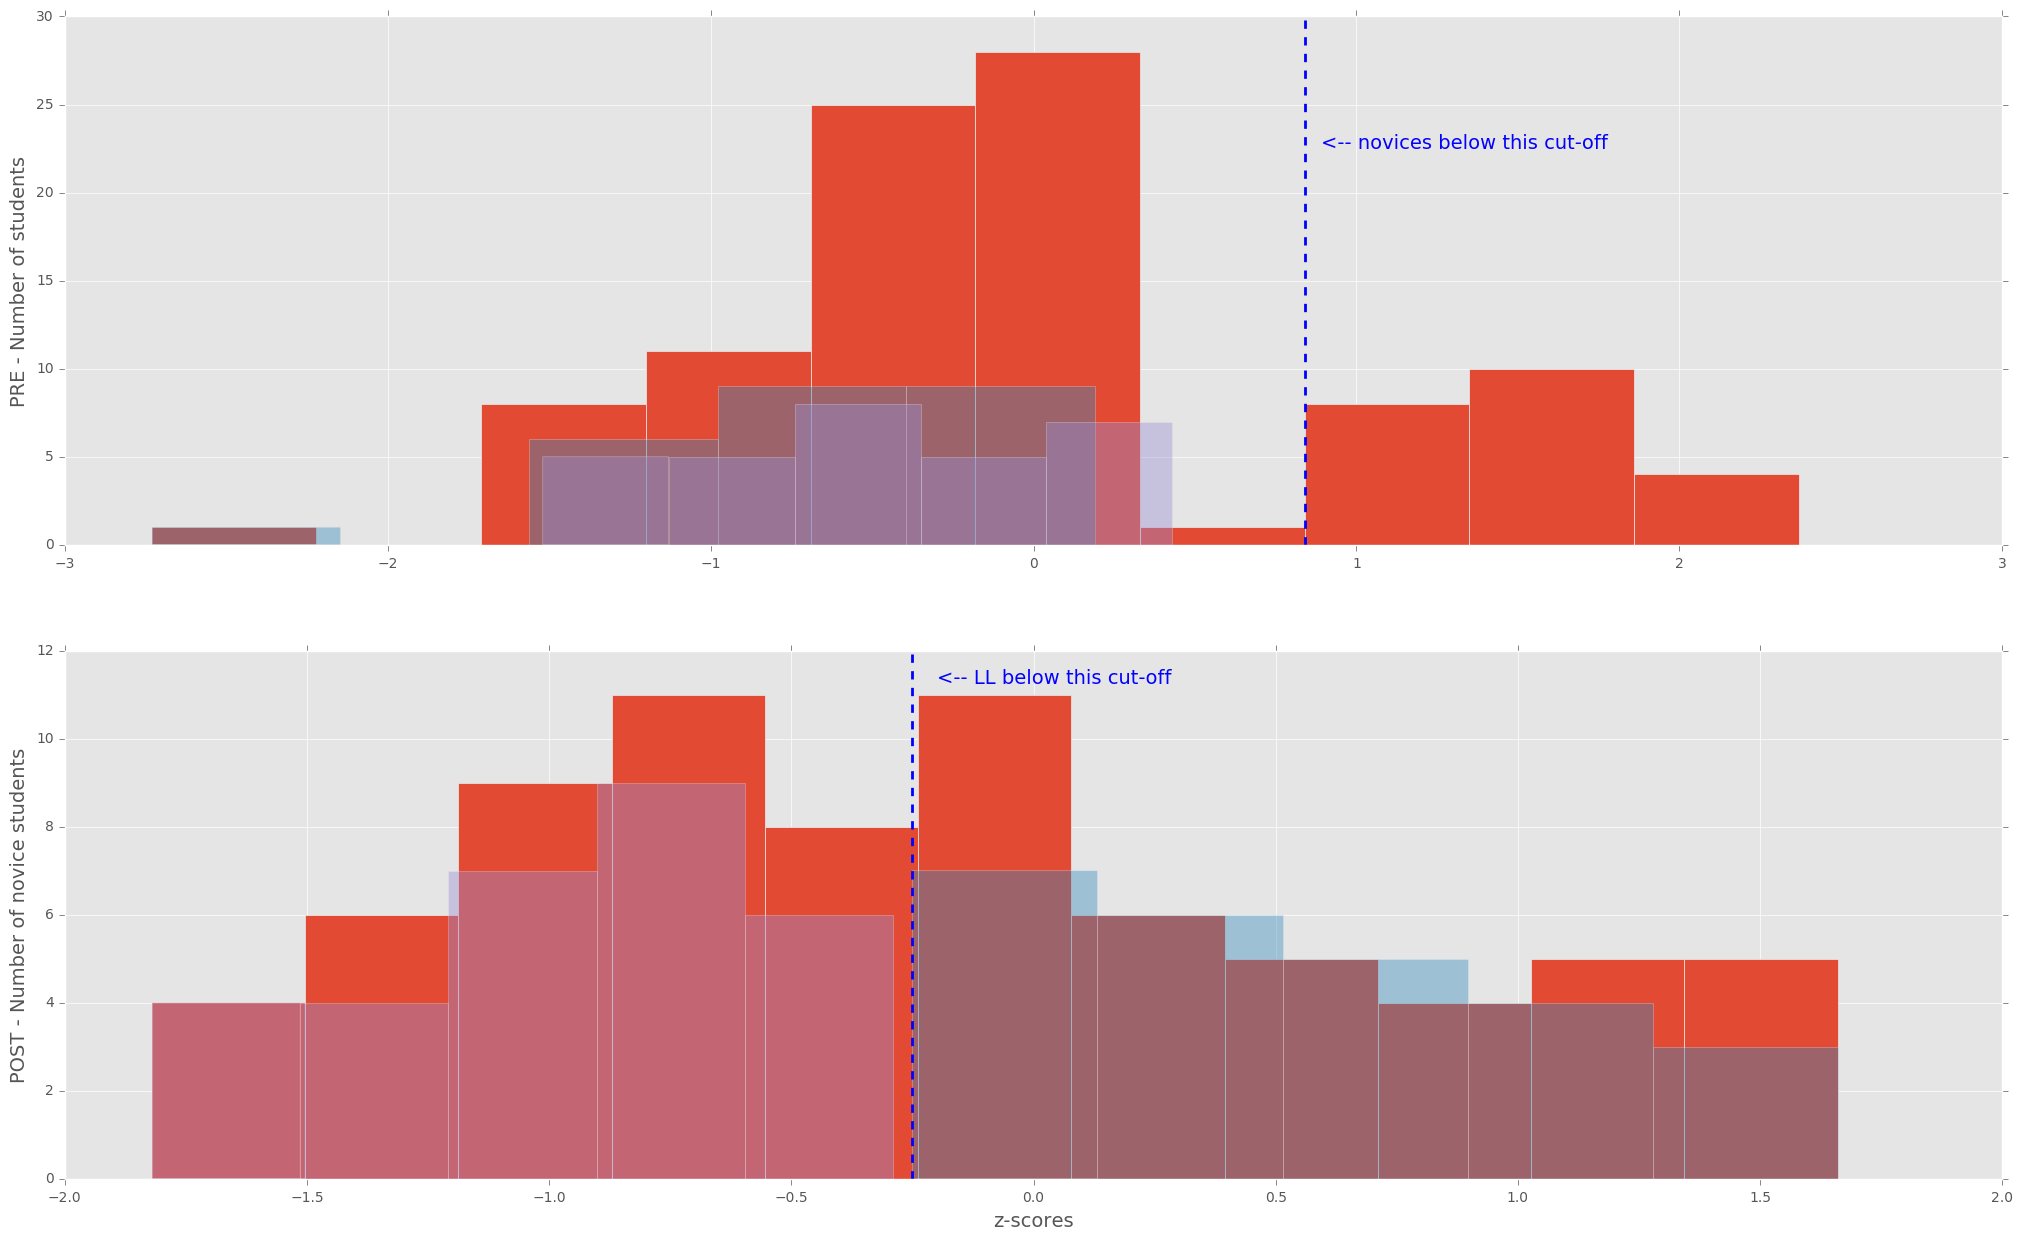

In [115]:
#Let's plot test scores of students that used top 5 sequences to make sure they are randomly distributed.
##plot pre-test z-scores
plt.subplot(2,1,1)
plt.hist(pre_scores)
plt.hist(df_scores['z pre'][df_scores['student'].isin(unique_student_list_LH)], bins=5, alpha=0.4)
plt.hist(df_scores['z pre'][df_scores['student'].isin(unique_student_list_LL)], bins=5, alpha=0.4)
plt.ylabel('PRE - Number of students', fontsize=14)
plt.axvline(cutoff, ls = '--', lw = 2)
plt.text(cutoff+0.05, 22.5, '<-- novices below this cut-off', fontsize=14, color='blue')

##plot post-test z-scores of novices (as defined above)
plt.subplot(2,1,2)
hpost = plt.hist(post_scores_novices, bins=11)
plt.hist(df_scores['z post t2'][df_scores['student'].isin(unique_student_list_LH)], bins=5, alpha=0.4)
plt.hist(df_scores['z post t2'][df_scores['student'].isin(unique_student_list_LL)], bins=5, alpha=0.4)
plt.ylabel('POST - Number of novice students', fontsize=14)
plt.xlabel('z-scores', fontsize=14)
plt.axvline(post_scores_novices_mdn, ls = '--', lw = 2)
plt.text(post_scores_novices_mdn+0.05, 11.25, '<-- LL below this cut-off', fontsize=14, color='blue')
